In [1]:
import cv2 as cv
import imutils
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\giova\AppData\Local\Tesseract-OCR\tesseract.exe'

In [2]:
# Passos:
#   1. Carregar imagem
#   2. Remover ruído
#   3. Desenhar contorno
#   4. Encontrar a placa
#   5. Aplicar binarização
#   6. Erosão das letras

#### definindo funções

In [3]:
# Carregar imagem
def load_image(image_file):
    image = cv.imread(image_file)
    image = imutils.resize(image, width=500)
    return image

In [4]:
# Remover ruído adicionando blur
def remove_noise(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray = cv.bilateralFilter(gray, 11, 17, 17)
    return gray

In [5]:
# Binarização da imagem
def grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

def binarization(image):
    gray_image = grayscale(image)
    thresh, im_bw = cv.threshold(gray_image, 100, 230, cv.THRESH_BINARY)
    return im_bw

In [293]:
# Detecção de bordas com Canny
def detect_edges(image):
    edged = cv.Canny(image, 170, 200)
    return edged

In [294]:
# Desenhando os contornos de encontrados com Canny
def draw_contours(edged, image):
    cnts, new = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    img1 = image.copy()
    cv.drawContours(img1, cnts, -1, (0, 255, 0), 3)
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)[:30]
    img2 = image.copy()
    cv.drawContours(img2, cnts, -1, (0, 255, 0), 3)
    return cnts, img2

In [295]:
# Função para encontrar o retângulo da placa
def find_plate(image, cnts):
    for c in cnts:
        # Perímero de uma forma fechada
        peri = cv.arcLength(c, True)
        
        # Aproxima o formato do da forma
        approx = cv.approxPolyDP(c, 0.02*peri, True)
        
        # Verifica se é um retângulo
        if len(approx) == 4:
            
            # Coordenadas do retângulo
            contorno_placa = approx
            x, y, w, h = cv.boundingRect(c)
            break
    
    # Desenha os retângulo na imagem
    cv.drawContours(image, [contorno_placa], -1, (0, 255, 0), 3)
    return image, y, h, x, w

In [296]:
# Passa a imagem para o PyTesseract e mostra a string do resultado
def gess_number(image):
    myconfig = r"--psm 9 --oem 3"
    text = pytesseract.image_to_string(image, config=myconfig, lang='eng')
    print('A placa é:', text)

In [297]:
# Aplica erode aos caracteres
def thick_image(image):
    kernel = np.ones((3, 3), np.uint8)
    cropped = cv.erode(image, kernel, iterations=1)
    return cropped

#### chamando funções

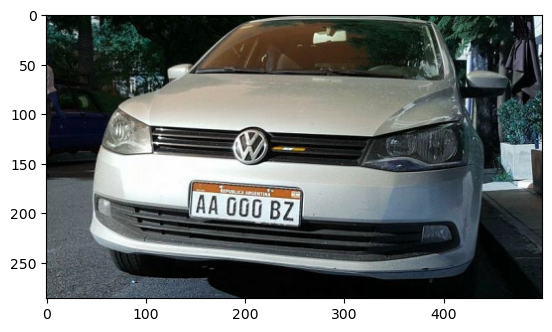

In [317]:
contorno_placa = None
img = load_image('placa3.jpg')
copy = img.copy()
plt.imshow(img, 'gray', vmin=0, vmax=255)

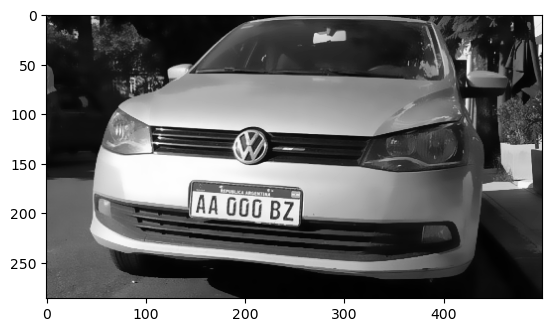

In [318]:
gray = remove_noise(img)
plt.imshow(gray, 'gray', vmin=0, vmax=255)

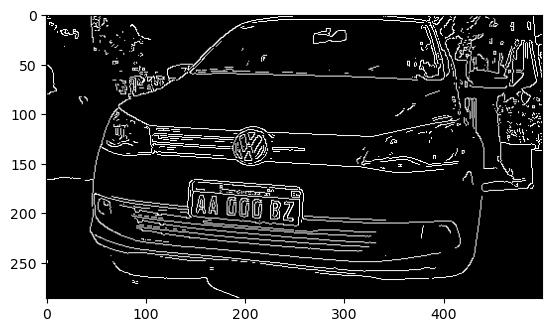

In [319]:
edged = detect_edges(gray)
plt.imshow(edged, 'gray', vmin=0, vmax=255)

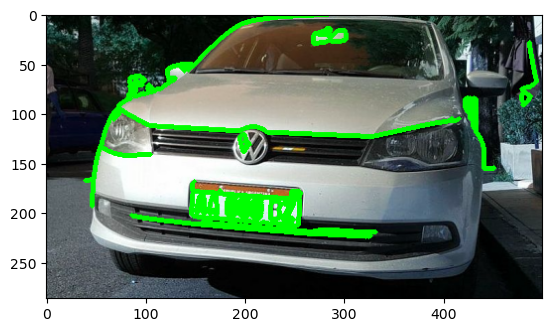

In [320]:
cnts, contours = draw_contours(edged, img)
plt.imshow(contours, 'gray', vmin=0, vmax=255)

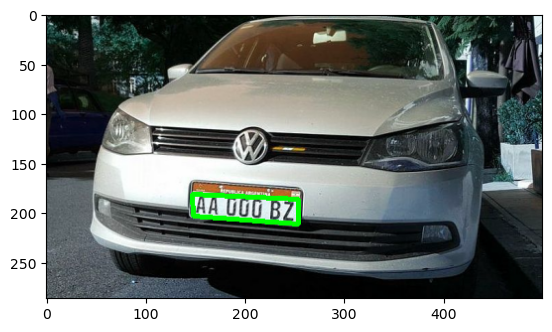

In [321]:
img1, y, h, x, w = find_plate(img, cnts)
new_img = copy[y:y + h, x:x + w]
plt.imshow(img1, 'gray', vmin=0, vmax=255)

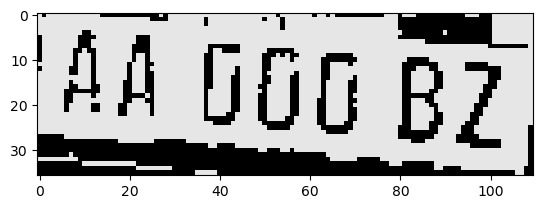

In [322]:
new_img = binarization(new_img)
plt.imshow(new_img, 'gray', vmin=0, vmax=255)

In [323]:
gess_number(new_img)

A placa é: AA GGG BZ



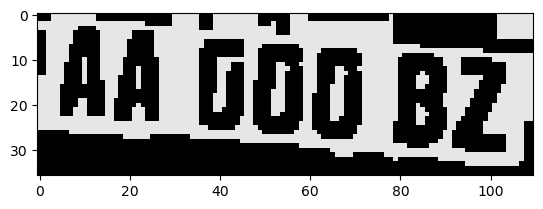

In [324]:
final_image = thick_image(new_img)
plt.imshow(final_image, 'gray', vmin=0, vmax=255)

In [325]:
gess_number(final_image)

A placa é: AA G60 B7,

